In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

In [2]:
def create_bell_pair(qc, a, b):
    """Create a Bell pair: qubit a và b"""
    qc.h(a)
    qc.cx(a, b)

def encode_message(qc, qubit, msg):
    """Alice encodes the 2-bit message into my qubit"""
    if msg == "00":
        pass    # I gate
    elif msg == "10":
        qc.x(qubit) # Bit flip
    elif msg == "01":
        qc.z(qubit) # Phase flip
    elif msg == "11":
        qc.z(qubit) # Flip the front phase
        qc.x(qubit) # Flip the next bit.
    else:
        print("Invalid message: Sending 00")

def decode_message(qc, a, b):
    """Bob decodes """
    qc.cx(a, b)
    qc.h(a)

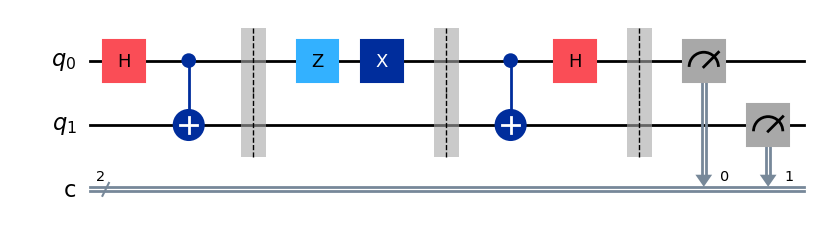

In [3]:
# 1. Circuit initialization (2 Qubits, 2 Classical Bits)
qc = QuantumCircuit(2, 2)

# 2. Create Chaos (Alice q0, Bob q1)
create_bell_pair(qc, 0, 1)
qc.barrier()

# 3. Alice encoded the message "11"
message = "11"
encode_message(qc, 0, message)
qc.barrier()

# --- Let's simulate Alice sending q0 to Bob. ---

# 4. Bob decodes
decode_message(qc, 0, 1)
qc.barrier()

# 5. Bob takes measurements
qc.measure([0, 1], [0, 1])

# Draw the circuit diagram
qc.draw('mpl')

Alice sent: 11
Bob received: {'11': 1024}


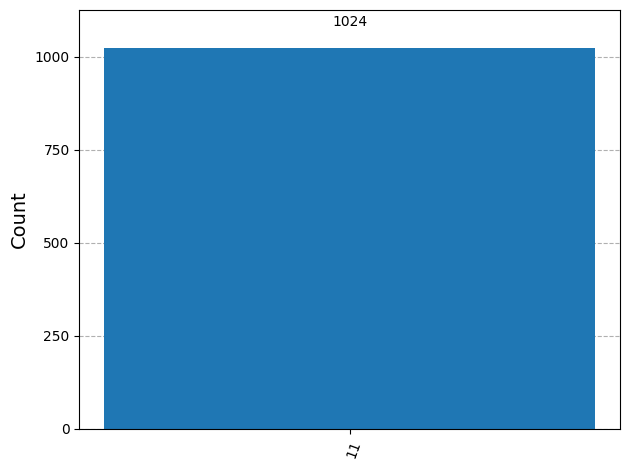

In [4]:
backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled, shots=1024).result()
counts = result.get_counts()
print(f"Alice sent: {message}")
print(f"Bob received: {counts}")
plot_histogram(counts)